# **1. Perkenalan Dataset**


   **Sumber Dataset**:  
   Dataset dapat diperoleh dari kaggle diabetes-prediction-dataset (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

import zipfile
zip_ref = zipfile.ZipFile('/content/diabetes-prediction-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 1.27GB/s]


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


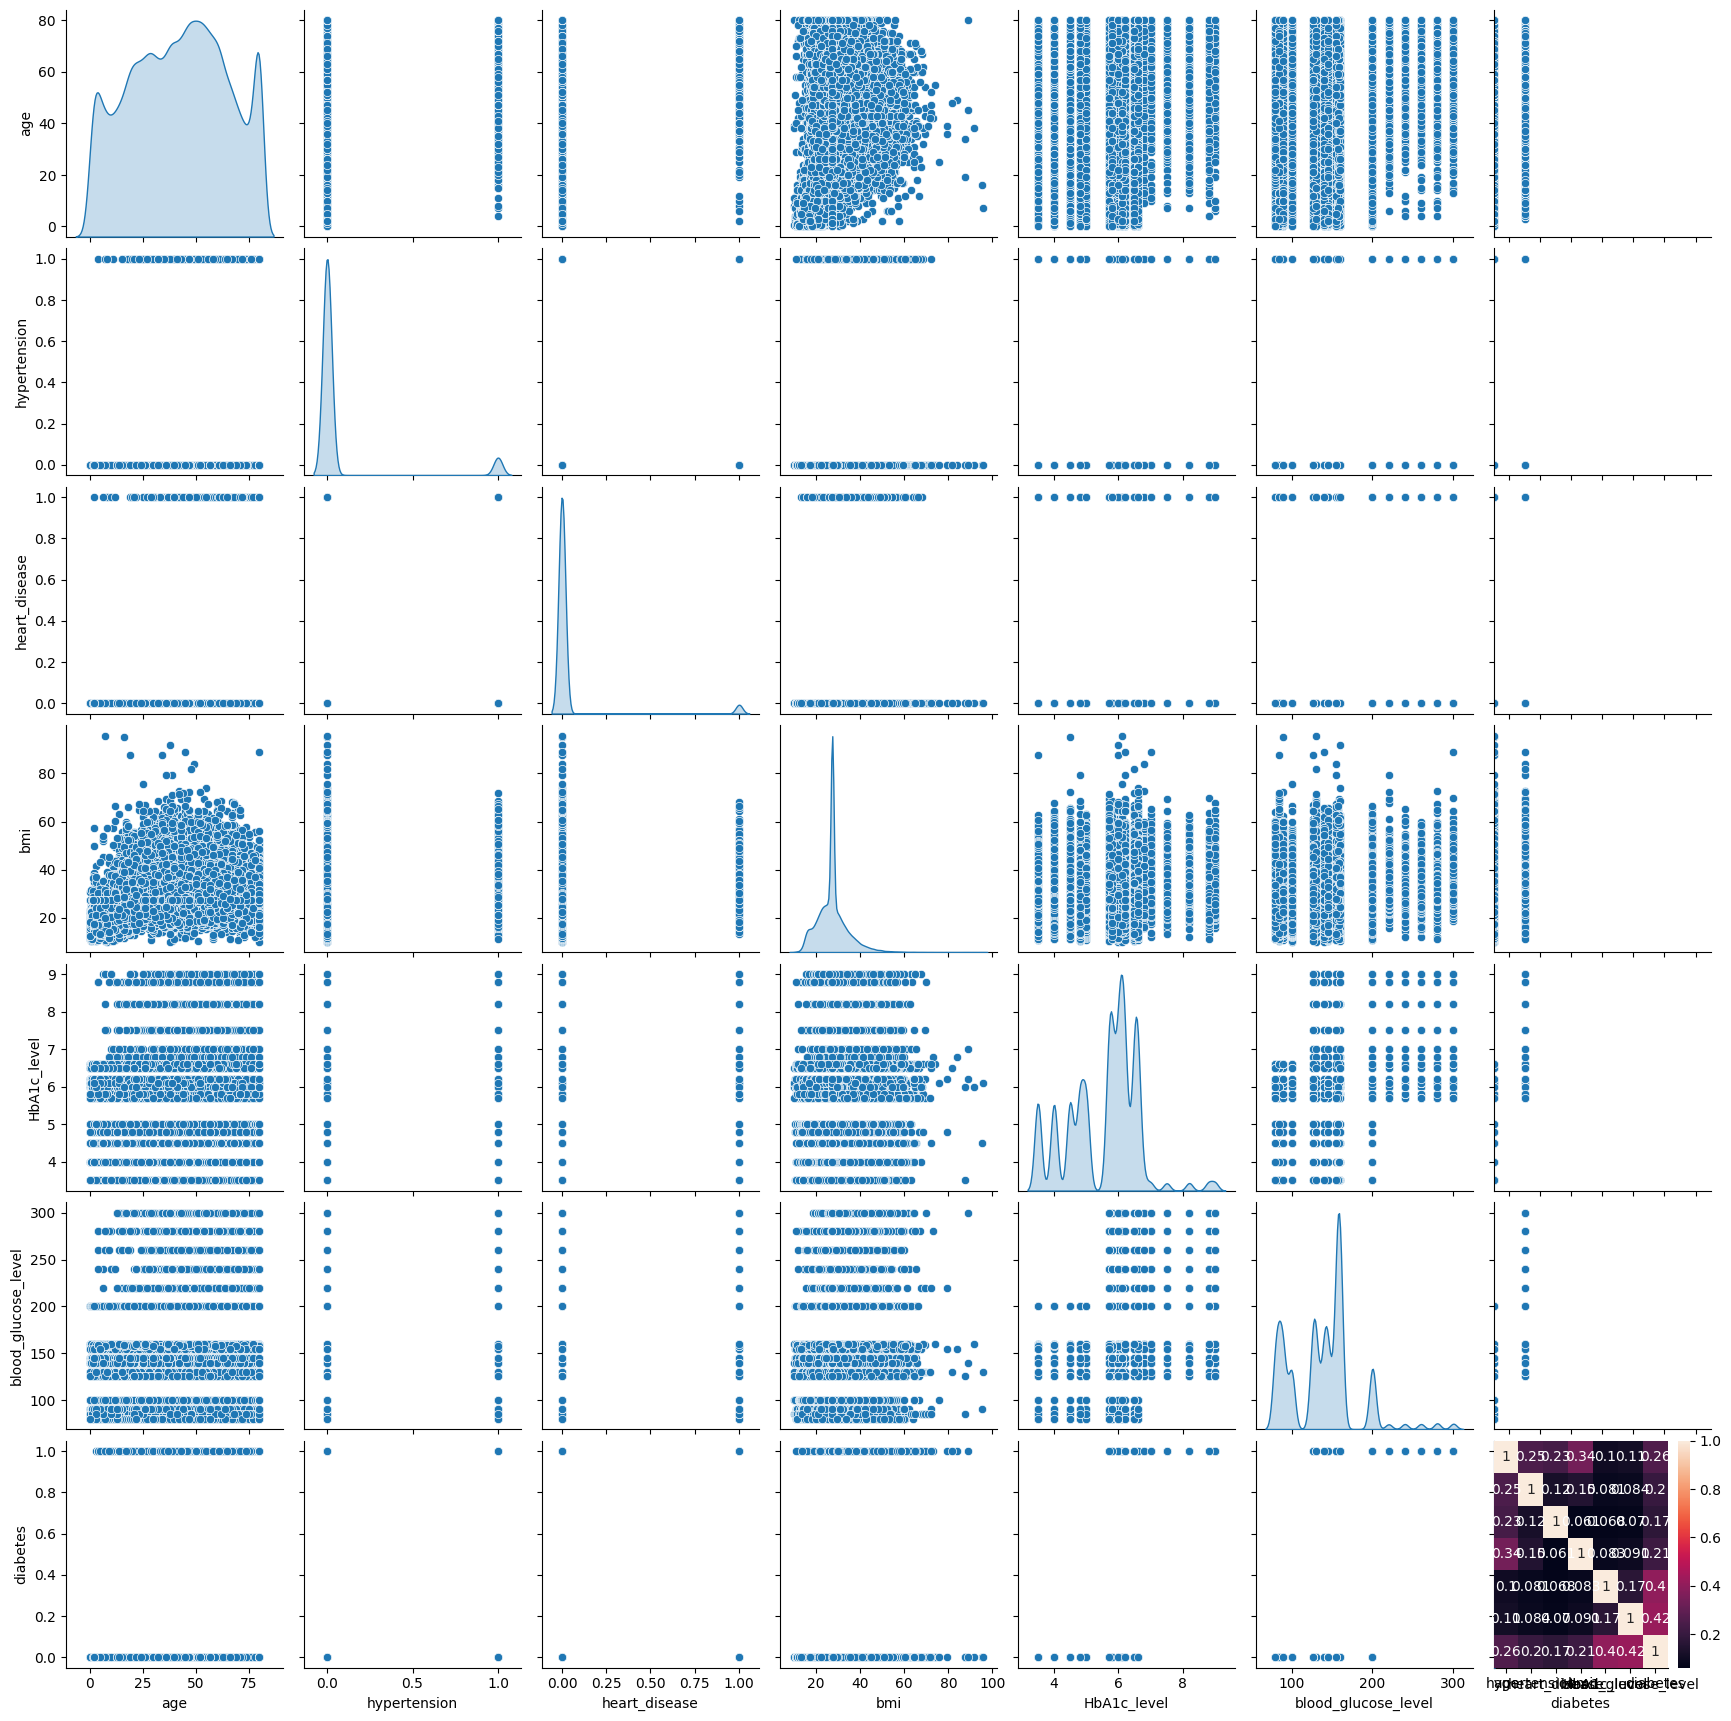

In [ ]:
"""# MULTIVARIATE ANALYSIS"""

sns.pairplot(df, diag_kind = 'kde')

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()



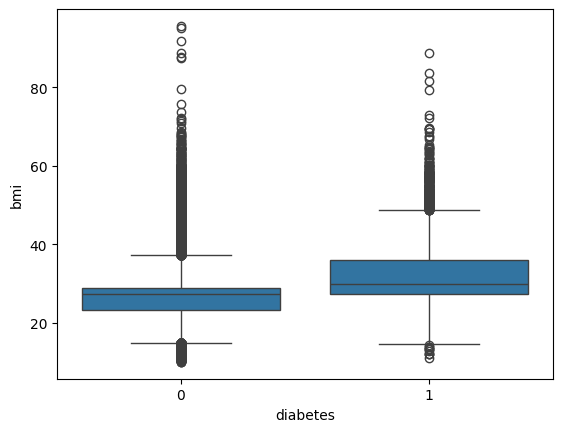

In [ ]:
"""# BIVARIATE ANALYSIS"""

sns.boxplot(x ='diabetes', y='bmi', data=df)
plt.show()

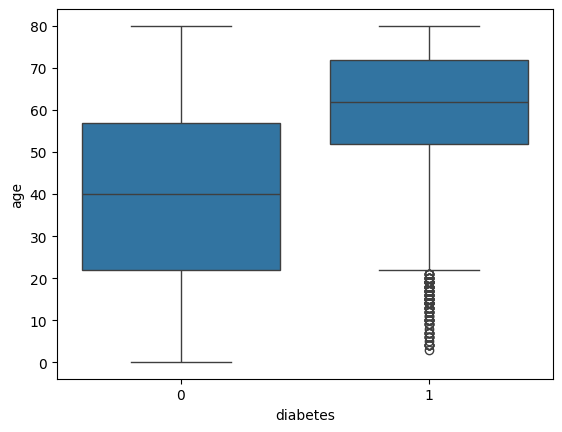

In [ ]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.show()

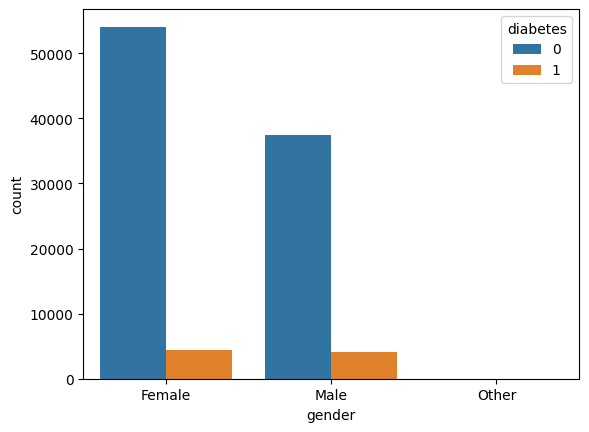

In [ ]:

sns.countplot(x = 'gender', hue  = 'diabetes', data=df)
plt.show()



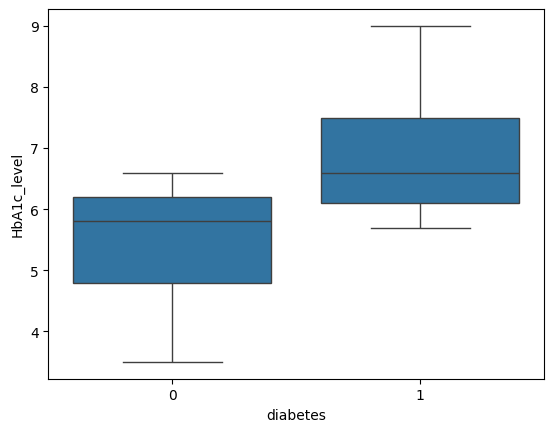

In [ ]:
sns.boxplot(x ='diabetes', y= 'HbA1c_level', data=df)
plt.show()


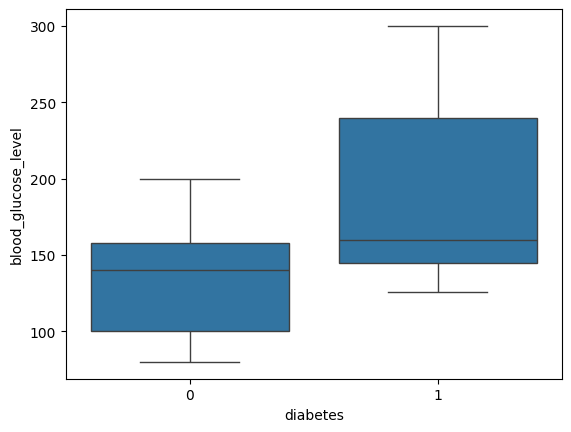

In [ ]:

sns.boxplot(x = 'diabetes', y= 'blood_glucose_level', data =df)
plt.show()



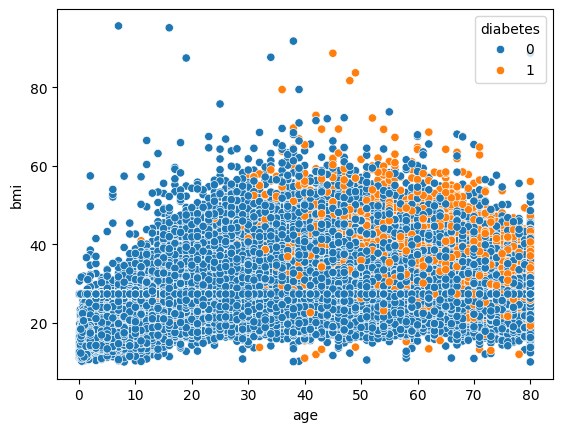

In [ ]:
sns.scatterplot(x='age', y='bmi', hue ='diabetes', data=df)
plt.show()




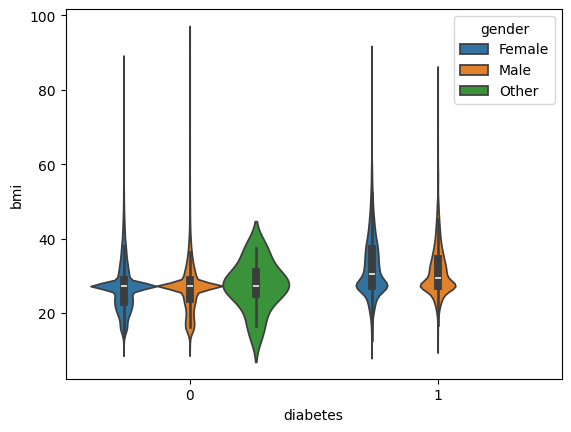

In [ ]:
sns.violinplot(x= 'diabetes', y='bmi', hue="gender",  data=df)
plt.show()


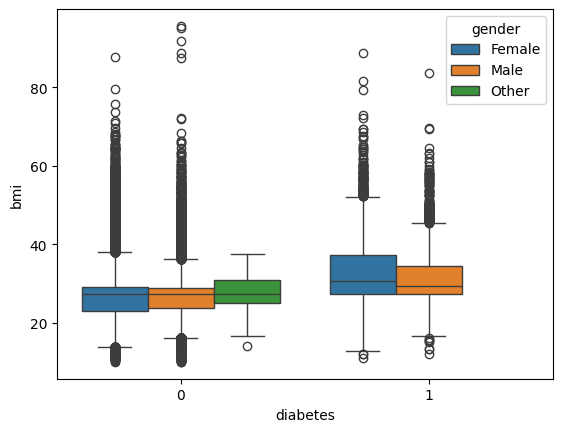

In [ ]:

sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.show()


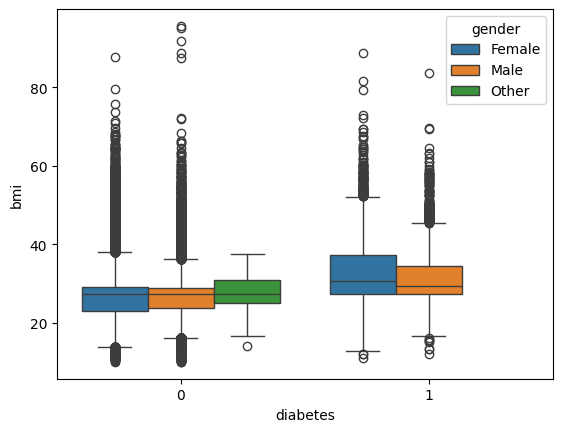

In [ ]:

sns.boxplot(x= 'diabetes', y='bmi', hue='gender', data=df)
plt.show()


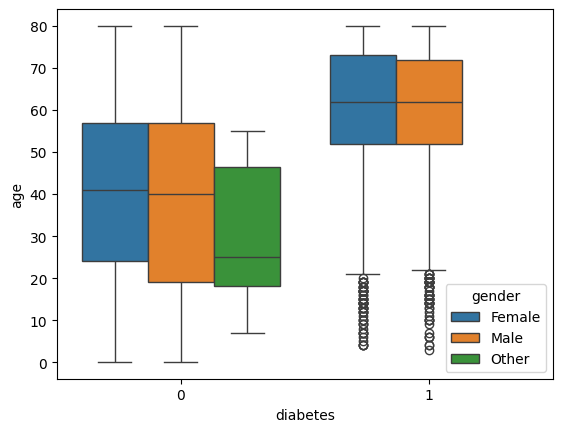

In [ ]:

sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

#### Melakukan Drop Column pada kolom smoking_history


In [ ]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)
df.duplicated().sum()
df['smoking_history'].value_counts() # 35816 no info so we should drop columns to avoid inaccureate data

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [ ]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

#### Proses untuk mendeteksi dan menghapus outlier (data pencilan) dari fitur numerik.


In [ ]:

numeric_columns = df.select_dtypes(include=['number']).columns  # Semua angka
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Split dataset

#### Pembagian dataset menjadi 80% digunakan untuk training model dan 20% untuk mengevaluasi model.


In [ ]:


from sklearn.model_selection import train_test_split
# Menentukan fitur (X) dan label (y)
X = df.drop(["diabetes"],axis =1)
y = df["diabetes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (76916, 8)
Testing set size: (19230, 8)


## Perubahan dataset ke csv masing-masing

In [ ]:
combined_df = pd.concat([X_train, y_train], axis=1)
combined_df.to_csv("diabetes_prediction_dataset_train.csv", index=False)

In [ ]:
combined_df_train = pd.concat([X_test, y_test], axis=1)
combined_df_train.to_csv("diabetes_prediction_dataset_test.csv", index=False)

In [ ]:
# ubah y ke dataframe
new_y_train = pd.DataFrame(y_train, columns=["diabetes"])
new_y_test = pd.DataFrame(y_test, columns=["diabetes"])

print(X_train.shape, X_test.shape)
print(new_y_train.shape, new_y_test.shape)

(76916, 8) (19230, 8)
(76916, 1) (19230, 1)


In [ ]:
new_y_test


,diabetes
2547,0
34774,0
71084,1
50584,0
80788,0
...,...
19314,0
17624,0
8673,0
37062,0
